**Porcentaje de sitios de monitoreo con registros de contaminación**

In [15]:
rm(list = ls())
libraries <- c("tidyverse",
               "ggplot2", 
               "jsonlite", 
               "httr")

installed_packages <- rownames(installed.packages())
libraries_to_install <- setdiff(libraries, installed_packages)

if (length(libraries_to_install) > 0) {
  install.packages(libraries_to_install)
}

lapply(libraries, library, character.only = TRUE)


[[1]]
 [1] "httr"       "jsonlite"   "showtext"   "showtextdb" "sysfonts"  
 [6] "srvyr"      "readxl"     "sf"         "lubridate"  "forcats"   
[11] "stringr"    "dplyr"      "purrr"      "readr"      "tidyr"     
[16] "tibble"     "ggplot2"    "tidyverse"  "stats"      "graphics"  
[21] "grDevices"  "utils"      "datasets"   "methods"    "base"      

[[2]]
 [1] "httr"       "jsonlite"   "showtext"   "showtextdb" "sysfonts"  
 [6] "srvyr"      "readxl"     "sf"         "lubridate"  "forcats"   
[11] "stringr"    "dplyr"      "purrr"      "readr"      "tidyr"     
[16] "tibble"     "ggplot2"    "tidyverse"  "stats"      "graphics"  
[21] "grDevices"  "utils"      "datasets"   "methods"    "base"      

[[3]]
 [1] "httr"       "jsonlite"   "showtext"   "showtextdb" "sysfonts"  
 [6] "srvyr"      "readxl"     "sf"         "lubridate"  "forcats"   
[11] "stringr"    "dplyr"      "purrr"      "readr"      "tidyr"     
[16] "tibble"     "ggplot2"    "tidyverse"  "stats"      "graphics"  
[21] "grDevices"  "utils"      "datasets"   "methods"    "base"      

[[4]]
 [1] "httr"       "jsonlite"   "showtext"   "showtextdb" "sysfonts"  
 [6] "srvyr"      "readxl"     "sf"         "lubridate"  "forcats"   
[11] "stringr"    "dplyr"      "purrr"      "readr"      "tidyr"     
[16] "tibble"     "ggplot2"    "tidyverse"  "stats"      "graphics"  
[21] "grDevices"  "utils"      "datasets"   "methods"    "base"

In [44]:
# Vector de años a consultar
anios <- 2020:2023

# Inicializar lista vacía para guardar los data.frames
lista_dfs <- list()

In [84]:
#Ciclo para descargar los datos de cada año

for (anio in anios) {
  message("Descargando datos del año: ", anio)
  
  url <- paste0(
    "https://geosinav30.conagua.gob.mx:8080/geoserver/Sina/ows?",
    "service=WFS&version=1.0.0&request=GetFeature&outputFormat=application%2Fjson",
    "&srsName=EPSG%3A4326&cql_filter=anio%3D", anio,
    "&typeName=Sina%3Am02_subterraneosAnual"
  )
  
  response <- GET(url)
  
  if (status_code(response) == 200) {
    data <- content(response )
    
    if (length(data$features) > 0) {
      df_anio<-map_dfr(data$features, ~ .x$properties)
      df_anio$anio <- anio  # agregar columna del año manualmente
      print(paste("Número de columnas:", ncol(df_anio)))
      print(paste("Número de registros:", nrow(df_anio)))
      lista_dfs[[as.character(anio)]] <- df_anio
    } else {
      message("Sin datos para el año ", anio)
    }
  } else {
    warning("Error en la solicitud para el año ", anio)
  }
}
    

Descargando datos del año: 2020



[1] "Número de columnas: 56"
[1] "Número de registros: 1068"


Descargando datos del año: 2021



[1] "Número de columnas: 54"
[1] "Número de registros: 667"


Descargando datos del año: 2022



[1] "Número de columnas: 56"
[1] "Número de registros: 775"


Descargando datos del año: 2023



[1] "Número de columnas: 41"
[1] "Número de registros: 606"


In [85]:
#Tabla final
estaciones_monitoreo <- bind_rows(lista_dfs)
print("Número de columnas en el DataFrame final:")
print(ncol(estaciones_monitoreo))
head(estaciones_monitoreo)

colnames(estaciones_monitoreo)

unique(estaciones_monitoreo$semaforo)


[1] "Número de columnas en el DataFrame final:"
[1] 56


clave,sitio,clvrha,rha,estado,municipio,acuifero,subtipo,anio,alc,⋯,cumple_coli_fec,cumple_n_no3,cumple_as,cumple_cd,cumple_cr,cumple_hg,cumple_pb,cumple_mn,cumple_fe,grupo
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
DLZAC2627,FRACC. CHE GUEVARA,VII,CUENCAS CENTRALES DEL NORTE,ZACATECAS,GUADALUPE,GUADALUPE BAÑUELOS,Pozo,2020,195.36,⋯,NO,SI,SI,SI,SI,SI,SI,SI,SI,SUBTERRANEO
DLZAC2628,CIENEGUITAS,VII,CUENCAS CENTRALES DEL NORTE,ZACATECAS,GUADALUPE,GUADALUPE BAÑUELOS,Pozo,2020,186.48,⋯,SI,SI,SI,SI,SI,SI,SI,SI,SI,SUBTERRANEO
DLZAC2629,SAN JERONIMO,VII,CUENCAS CENTRALES DEL NORTE,ZACATECAS,GUADALUPE,GUADALUPE BAÑUELOS,Pozo,2020,185.37,⋯,SI,SI,SI,SI,SI,SI,SI,SI,SI,SUBTERRANEO
DLZAC2630,BAÑUELOS,VII,CUENCAS CENTRALES DEL NORTE,ZACATECAS,GUADALUPE,GUADALUPE BAÑUELOS,Pozo,2020,195.36,⋯,SI,SI,SI,SI,SI,SI,SI,SI,SI,SUBTERRANEO
DLZAC2682,POZO 581 PARDILLO (SUSTITUTO POZO NO. 2007 AGUA POTABLE SANTA ANA),VII,CUENCAS CENTRALES DEL NORTE,ZACATECAS,FRESNILLO,CALERA,Pozo,2020,170.94,⋯,SI,SI,SI,SI,SI,SI,SI,SI,SI,SUBTERRANEO
DLZAC2621,ENRIQUE ESTRADA,VII,CUENCAS CENTRALES DEL NORTE,ZACATECAS,GENERAL ENRIQUE ESTRADA,CALERA,Pozo,2020,157.62,⋯,SI,SI,SI,SI,SI,SI,SI,SI,SI,SUBTERRANEO


[1] "clave"            "sitio"            "clvrha"           "rha"             
 [5] "estado"           "municipio"        "acuifero"         "subtipo"         
 [9] "anio"             "alc"              "c_alc"            "conduct"         
[13] "c_conduct"        "sdt"              "c_sdt_ra"         "c_sdt_salin"     
[17] "fluoruros"        "c_fluoruros"      "dur"              "c_dur"           
[21] "coli_fec"         "c_coli_fec"       "n_no3"            "c_n_no3"         
[25] "as_"              "c_as_"            "cd"               "c_cd"            
[29] "cr"               "c_cr"             "hg"               "c_hg"            
[33] "pb"               "c_pb"             "mn"               "c_mn"            
[37] "fe"               "c_fe"             "semaforo"         "contaminantes"   
[41] "cumple_alc"       "cumple_conduct"   "cumple_sdt_ra"    "cumple_sdt_salin"
[45] "cumple_fluoruros" "cumple_dur"       "cumple_coli_fec"  "cumple_n_no3"    
[49] "cumple_as"        "cumple_cd"        "cumple_cr"        "cumple_hg"       
[53] "cumple_pb"        "cumple_mn"        "cumple_fe"        "grupo"

[1] "Rojo"     "Verde"    "Amarillo"

In [86]:
# Leer los datos para cada año sin sobrescribir el mismo objeto
estaciones_monitoreo <- estaciones_monitoreo|>
filter(rha == "AGUAS DEL VALLE DE MÉXICO")|>
  mutate(contaminacion = ifelse(semaforo %in% c("Amarillo", "Rojo"), "Contaminada", "No contaminada"))|>
  select(rha, clave, contaminacion, anio)


In [87]:
# Crear lista de dataframes de claves por año
claves_comunes <- estaciones_monitoreo|>
                filter(anio == 2023)|>
                select(clave)
claves_comunes

clave
<chr>
DLHID0003LNR
DLHID0006LNR
DLHID1486M1
DLHID6145
DLHID6461
DLHID6467
OCAVM0002LNR
OCAVM0018RNL21
OCAVM0019RNL21


In [88]:
estaciones_monitoreo <- estaciones_monitoreo|>
    filter(clave %in% claves_comunes$clave)|>
  group_by(anio, contaminacion) |>
  summarise(total_estaciones = n(), .groups = "drop") |>
  group_by(anio) |>
  mutate(porcentaje = total_estaciones * 100 / sum(total_estaciones))|>
  filter(contaminacion == "Contaminada") |>
  mutate(tipo = "Observado")

estaciones_monitoreo

estaciones_monitoreo_2023 <- estaciones_monitoreo |> filter(anio == 2023)
estaciones_monitoreo_2020 <- estaciones_monitoreo |> filter(anio == 2020)


anio,contaminacion,total_estaciones,porcentaje,tipo
<int>,<chr>,<int>,<dbl>,<chr>
2020,Contaminada,3,60,Observado
2022,Contaminada,2,50,Observado
2023,Contaminada,6,50,Observado


In [91]:
##ESCENARIOS TENDENCIALES 2030,2035,2045
# Tasa de variación
tcma<-((estaciones_monitoreo_2023$porcentaje /estaciones_monitoreo_2020$porcentaje)^(1/(2023-2020)) - 1) 
tcma

porcentaje_base <- estaciones_monitoreo |>
  filter(anio == 2020) |>
  pull(porcentaje)

# Años a proyectar
años <- c(2030, 2040, 2045)
año_base <- 2020

tendencia_base <- data.frame(anio = años,
                             porcentaje = round(porcentaje_base * (1 + 1/3*tcma ) ^ (años - año_base), 2),
                             tipo = "Inercial")


tendecia_deseable<-data.frame(anio = años,
                              porcentaje = round(porcentaje_base * (1 + 1/2*tcma) ^ (años - año_base), 2),
                              tipo = "Deseable")


tendecia_transformadora <-data.frame(anio = años,
                                     porcentaje = round(porcentaje_base * (1 + tcma) ^ (años - año_base), 2),
                                     tipo = "Transformador")


estaciones_monitoreo_tendencias <- estaciones_monitoreo|>
  bind_rows(tendencia_base,tendecia_deseable, 
            tendecia_transformadora)|>
  select(anio, porcentaje, tipo)

estaciones_monitoreo_tendencias


[1] -0.05896397

anio,porcentaje,tipo
<dbl>,<dbl>,<chr>
2020,60.00,Observado
2022,50.00,Observado
2023,50.00,Observado
2030,49.20,Inercial
2040,40.34,Inercial
2045,36.53,Inercial
2030,44.48,Deseable
2040,32.98,Deseable
2045,28.39,Deseable


In [93]:
lineas <- bind_rows(data.frame(anio = c(2023, 2030),
                               porcentaje = c(estaciones_monitoreo_tendencias$porcentaje[estaciones_monitoreo_tendencias$anio == 2023 & estaciones_monitoreo_tendencias$tipo == "Observado"],
                                              estaciones_monitoreo_tendencias$porcentaje[estaciones_monitoreo_tendencias$anio == 2030 & estaciones_monitoreo_tendencias$tipo == "Inercial"]),
                               tipo = "Inercial"),
                    data.frame(anio = c(2023, 2030),
                               porcentaje = c(estaciones_monitoreo_tendencias$porcentaje[estaciones_monitoreo_tendencias$anio == 2023 & estaciones_monitoreo_tendencias$tipo == "Observado"], 
                                              estaciones_monitoreo_tendencias$porcentaje[estaciones_monitoreo_tendencias$anio == 2030 & estaciones_monitoreo_tendencias$tipo == "Deseable"]),
                               tipo = "Deseable"), 
                    data.frame(anio = c(2023, 2030),
                               porcentaje = c(estaciones_monitoreo_tendencias$porcentaje[estaciones_monitoreo_tendencias$anio == 2023 & estaciones_monitoreo_tendencias$tipo == "Observado"], 
                                              estaciones_monitoreo_tendencias$porcentaje[estaciones_monitoreo_tendencias$anio == 2030 & estaciones_monitoreo_tendencias$tipo == "Transformador"]),
                               tipo = "Transformador"))


paleta_colores <- c("Observado" = "#9F2241",
                    "Inercial" = "#cfcfcf" ,
                    "Deseable" = "#027A35", 
                    "Transformador" = "#AC6D14")

linetypes <- c("Observado" = "solid",
               "Inercial" = "dotdash",
               "Deseable" = "dotdash", 
               "Transformador" = "dotdash")

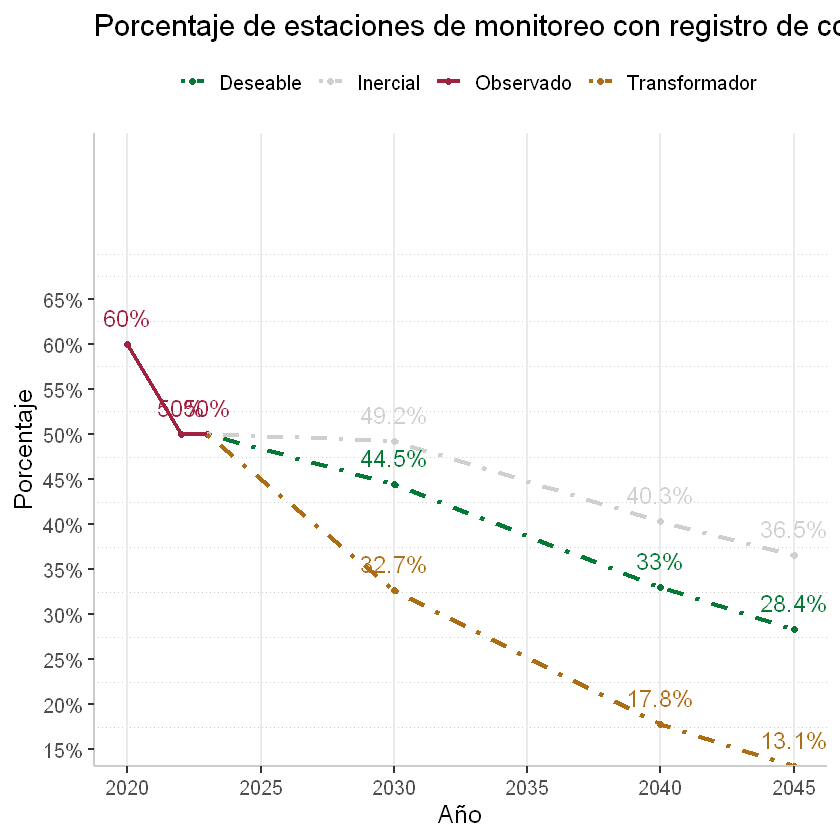

In [95]:
# Gráfico con etiquetas y eje Y personalizado
ggplot(estaciones_monitoreo_tendencias, aes(x = anio, y = porcentaje, group = tipo, color = tipo, linetype = tipo)) +
  geom_line(linewidth = 1.2) +
  geom_point(size = 1.5) +
  geom_line(data = lineas, aes(x = anio, y = porcentaje, group = tipo), linewidth = 1.2) +
  geom_text(aes(label = paste0(round(porcentaje, 1), "%")),
            vjust = -1, size = 5, show.legend = FALSE) +
  scale_color_manual(values = paleta_colores) +
  scale_linetype_manual(values = linetypes) +
  scale_y_continuous(breaks = seq(0, max(estaciones_monitoreo_tendencias$porcentaje, na.rm = TRUE) + 5, by = 5),
                     labels = function(x) paste0(x, "%"),
                     expand = expansion(mult = c(0,0.5))) +
  labs(title = "Porcentaje de estaciones de monitoreo con registro de contaminación",
       x = "Año",
       y = "Porcentaje",
       color = "",
       linetype = "") +
  theme_bw(base_size = 15) +
  theme( panel.grid.minor.y = element_line(color = "gray80", linetype = "dotted"),
         panel.grid.minor.x = element_blank(),
         panel.grid.major.y = element_blank(),
         panel.border = element_blank(),
         axis.line = element_line(color = "gray80"),
         legend.position = "top",
         plot.caption = element_text(hjust = 0))